<a href="https://colab.research.google.com/github/epheemeeral/-/blob/main/%D0%9F%D0%A05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Паттерны проектирования. Декоратор и наблюдатель.
#Задача №1

Представьте себя ненадолго разработчиком компьютерной игры в стиле фэнтези.
Вы будете прописывать систему эффектов, которые могут быть наложены на героя вашей игры.

У вас есть герой, который обладает некоторым набором характеристик.
Враги и союзники могут накладывать на героя положительные и отрицательные эффекты.

Эти эффекты каким-то образом изменяют характеристики героя.
На героя можно накладывать бесконечно много эффектов, действие одинаковых эффектов суммируется.

Игрок должен знать, какие положительные и какие отрицательные эффекты на него были наложены и в каком порядке.

In [ ]:
from abc import ABC, abstractmethod
class Hero:
    def __init__(self):
        self.positive_effects = []
        self.negative_effects = []

        self.stats = {
            "HP": 128,
            "MP": 42,
            "SP": 100,

            "Strength": 15,
            "Perception": 4,
            "Endurance": 8,
            "Charisma": 2,
            "Intelligence": 3,
            "Agility": 8,
            "Luck": 1
        }

    def get_positive_effects(self):
        return self.positive_effects.copy()

    def get_negative_effects(self):
        return self.negative_effects.copy()

    def get_stats(self):
        return self.stats.copy()

Вам нужно написать систему декораторов, представленную на UML-диаграмме

Названия наложенных положительных и отрицательных эффектов добавляются каждое в свой счетчик.
Названия эффектов совпадают с названиями классов.

Описания эффектов:

- Берсерк — Увеличивает параметры Сила, Выносливость, Ловкость, Удача на 7;
уменьшает параметры Восприятие, Харизма, Интеллект на 3. Количество единиц здоровья увеличивается на 50.
- Благословение — Увеличивает все основные характеристики на 2.
- Слабость — Уменьшает параметры Сила, Выносливость, Ловкость на 4.
- Сглаз — Уменьшает параметр Удача на 10.
- Проклятье — Уменьшает все основные характеристики на 2.
К основным характеристикам относятся Сила (Strength), Восприятие (Perception), Выносливость (Endurance),
Харизма (Charisma), Интеллект (Intelligence), Ловкость (Agility), Удача (Luck).

При выполнении задания учитывайте, что:

- Изначальные характеристики базового объекта не должны меняться.
- Изменения характеристик и накладываемых эффектов (баффов/дебаффов) должно происходить динамически,
то есть при запросе get_stats, get_positive_effects, get_negative_effects
- Абстрактные классы AbstractPositive, AbstractNegative и соответственно их потомки могут принимать любой параметр base
при инициализации объекта (_ _ init _ _ (self, base))
- Проверяйте, что эффекты корректно снимаются, в том числе и из середины стека.

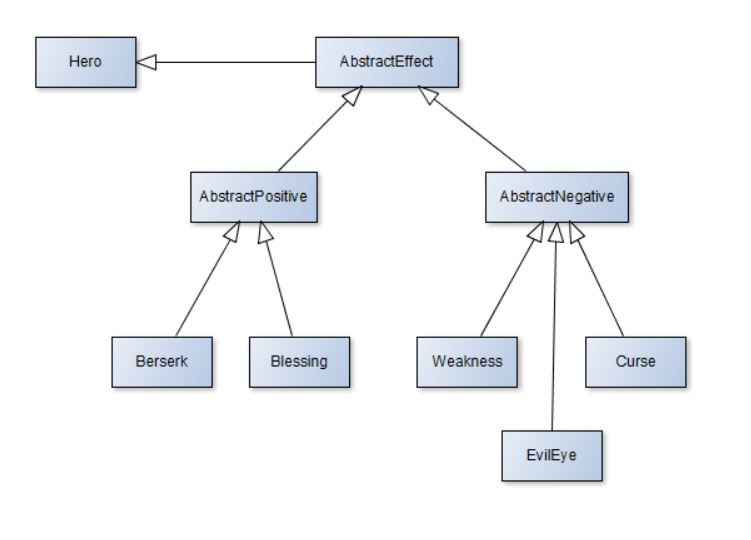

In [ ]:
class AbstractEffect(Hero, ABC):
    def __init__(self, base):
        self.base = base

    @abstractmethod
    def get_positive_effects(self):
        return self.positive_effects

    @abstractmethod
    def get_negative_effects(self):
        return self.negative_effects

    @abstractmethod
    def get_stats(self):
        pass


class AbstractPositive(AbstractEffect):
    def get_negative_effects(self):
        return self.base.get_negative_effects()


class AbstractNegative(AbstractEffect):    
    def get_positive_effects(self):
        return self.base.get_positive_effects()


class Berserk(AbstractPositive):    
    def get_stats(self):
        stats = self.base.get_stats()
        stats["HP"] += 50
        stats["Strength"] += 7
        stats["Endurance"] += 7
        stats["Agility"] += 7
        stats["Luck"] += 7
        stats["Perception"] -= 3
        stats["Charisma"] -= 3
        stats["Intelligence"] -= 3
        return stats

    def get_positive_effects(self):
        return self.base.get_positive_effects() + ["Berserk"]


class Blessing(AbstractPositive):    
    def get_stats(self):
        stats = self.base.get_stats()
        stats["Strength"] += 2
        stats["Endurance"] += 2
        stats["Agility"] += 2
        stats["Luck"] += 2
        stats["Perception"] += 2
        stats["Charisma"] += 2
        stats["Intelligence"] += 2
        return stats

    def get_positive_effects(self):
        return self.base.get_positive_effects() + ["Blessing"]


class Weakness(AbstractNegative):    
    def get_stats(self):
        stats = self.base.get_stats()
        stats["Strength"] -= 4
        stats["Endurance"] -= 4
        stats["Agility"] -= 4
        return stats

    def get_negative_effects(self):
        return self.base.get_negative_effects() + ["Weakness"]


class Curse(AbstractNegative):
    def get_stats(self):
        stats = self.base.get_stats()
        stats["Strength"] -= 2
        stats["Endurance"] -= 2
        stats["Agility"] -= 2
        stats["Luck"] -= 2
        stats["Perception"] -= 2
        stats["Charisma"] -= 2
        stats["Intelligence"] -= 2
        return stats

    def get_negative_effects(self):
        return self.base.get_negative_effects() + ["Curse"]


class EvilEye(AbstractNegative):
    def get_stats(self):
        stats = self.base.get_stats()
        stats["Luck"] -= 10
        return stats

    def get_negative_effects(self):
        return self.base.get_negative_effects() + ["EvilEye"]

In [ ]:
a = Hero()  

print('Характеристика героя 2:', a.get_stats())

blessing_effect = Blessing(a) #накладывание благославение на героя а
a = blessing_effect
print('Характеристика героя a после благославения: ', a.get_stats())

weakness_effect = Weakness(a)  #накладывание слабости на героя а
a = weakness_effect
print('Характеристика героя a после слабости: ', a.get_stats())

print('Позитивные эффекты, примененные к герою: ', a.get_positive_effects())

print('Негативные эффекты, примененные к герою: ', a.get_negative_effects())

Характеристика героя 2: {'HP': 128, 'MP': 42, 'SP': 100, 'Strength': 15, 'Perception': 4, 'Endurance': 8, 'Charisma': 2, 'Intelligence': 3, 'Agility': 8, 'Luck': 1}
Характеристика героя a после благославения:  {'HP': 128, 'MP': 42, 'SP': 100, 'Strength': 17, 'Perception': 6, 'Endurance': 10, 'Charisma': 4, 'Intelligence': 5, 'Agility': 10, 'Luck': 3}
Характеристика героя a после слабости:  {'HP': 128, 'MP': 42, 'SP': 100, 'Strength': 13, 'Perception': 6, 'Endurance': 6, 'Charisma': 4, 'Intelligence': 5, 'Agility': 6, 'Luck': 3}
Позитивные эффекты, примененные к герою:  ['Blessing']
Негативные эффекты, примененные к герою:  ['Weakness']


In [ ]:
#БИТВА 

a = Hero()  
b = Hero()  

# меняем характеристики героев
a.stats["Strength"] -= 5
a.stats["Endurance"] += 3
a.stats["Agility"] += 2

b.stats["Strength"] += 10
b.stats["Endurance"] += 4
b.stats["Agility"] += 5

# характеристики героев перед битвой
print("Характеристики героя 1: ", a.get_stats())
print("Характеристики героя 2: ", b.get_stats())

# битвa
while a.stats['HP'] > 0 and b.stats['HP'] > 0:
    # Герой a атакует героя b
    a.stats['HP'] -= a.stats['Strength']
    print("Герой a атакует Героя b. HP Героя b:", b.stats['HP'])

    if b.stats['HP'] <= 0:
        break

    # Герой b атакует героя a
    a.stats['HP'] -= b.stats['Strength']
    print("Герой b атакует Героя a. HP Героя a:", a.stats['HP'])

if a.stats['HP'] <= 0 and b.stats['HP'] <= 0:
    print("Битва закончилась ничьей!")
elif a.stats['HP'] <= 0:
    print("Победа героя b, герой a мертв!")
else:
    print("Победа героя a!")

Характеристики героя 1:  {'HP': 128, 'MP': 42, 'SP': 100, 'Strength': 10, 'Perception': 4, 'Endurance': 11, 'Charisma': 2, 'Intelligence': 3, 'Agility': 10, 'Luck': 1}
Характеристики героя 2:  {'HP': 128, 'MP': 42, 'SP': 100, 'Strength': 25, 'Perception': 4, 'Endurance': 12, 'Charisma': 2, 'Intelligence': 3, 'Agility': 13, 'Luck': 1}
Герой a атакует Героя b. HP Героя b: 128
Герой b атакует Героя a. HP Героя a: 93
Герой a атакует Героя b. HP Героя b: 128
Герой b атакует Героя a. HP Героя a: 58
Герой a атакует Героя b. HP Героя b: 128
Герой b атакует Героя a. HP Героя a: 23
Герой a атакует Героя b. HP Героя b: 128
Герой b атакует Героя a. HP Героя a: -12
Победа героя b, герой a мертв!


#Задача №2
Продолжая работу над игрой, вы добрались до системы достижений. Иногда игре нужно наградить игрока за то, что он достигает определенного результата в игре. Это может быть, например, прохождение всех заданий в игре, достижение определенного уровня, совершение какого-то сложного действия и т.д.

У каждой игры есть движок и интерфейс пользователя. Это два компонента, которые работают параллельно и взаимодействуют друг с другом. Достижения генерируются движком игры, а отображаются пользовательским интерфейсом. Кроме того, на современных игровых площадках, таких как Steam, Google Play, также отображаются достижения, полученные игроком. Для этого применяется как раз паттерн Наблюдатель.

У вас есть движок Engine, который может создавать уведомления о достижениях. Вам необходимо написать обертку над движком, которая будет иметь возможность подписывать наблюдателей и рассылать им уведомления, а также иерархию наблюдателей. В иерархию наблюдателей должны входить абстрактный наблюдатель, AbstractObserver, от которого унаследованы 2 наблюдателя ShortNotificationPrinter и FullNotificationPrinter. Первый из них составляет множество названий полученных достижений, второй составляет список достижений в том порядке, в котором они даны в системе. Имейте в виду, что каждое достижение должно быть учтено только один раз.


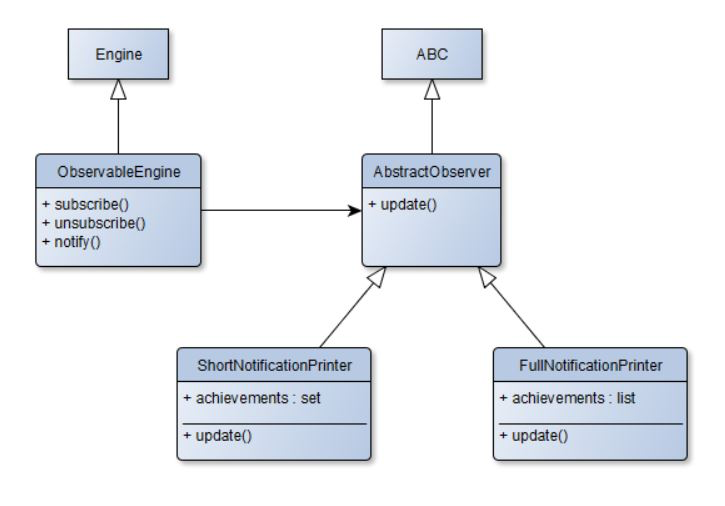

Метод update не должен возвращать никаких значений, он должен только изменять переменную achievements.

Класс Engine реализовывать не нужно!

In [6]:
from abc import ABC, abstractmethod

class ObservableEngine:
    def __init__(self):
        self.__subscribers = set()

    def subscribe(self, subscriber):
        self.__subscribers.add(subscriber)

    def unsubscribe(self, subscriber):
        self.__subscribers.remove(subscriber)

    def notify(self, message):
        for subscriber in self.__subscribers:
            subscriber.update(message)


class AbstractObserver(ABC):
    @abstractmethod
    def update(self, message):
        pass


class ShortNotificationPrinter(AbstractObserver):
    def __init__(self):
        self.achievements = set()

    def update(self, message):
        self.achievements.add(message['title'])


class FullNotificationPrinter(AbstractObserver):
    def __init__(self):
        self.achievements = []

    def update(self, message):
        if message not in self.achievements:
            self.achievements.append(message)

In [7]:
a = ObservableEngine() #движок
b = ShortNotificationPrinter() #наблюдатель b
c = FullNotificationPrinter() #наблюдатель c

a.subscribe(b) #подписка наблюдателя b на движок a 
a.subscribe(c) #подписка наблюдателя c на движок a 

# cоздаем и отправляем уведомления
x1 = {'title': 'Победа в битве'}
x2 = {'title': 'Достижение разблокировано'}
x3 = {'title': 'По колено в трупах'}
x4 = {'title': 'Стреляй, пока он не умрет'}
x5 = {'title': 'Мясник'}
x6 = {'title': 'Рвать и метать'}
x7 = {'title': 'Добавим жару'}
x8 = {'title': 'С глазу на глаз'}
x9 = {'title': 'Лудильщик'}

a.notify(x1)
a.notify(x2)
a.notify(x3)
a.notify(x4)
a.notify(x5)
a.notify(x6)
a.notify(x7)
a.notify(x8)
a.notify(x9)

# выводим достижения каждого наблюдателя
print("Достижения:")
for achievement in c.achievements:
    print(achievement['title'])

Достижения:
Победа в битве
Достижение разблокировано
По колено в трупах
Стреляй, пока он не умрет
Мясник
Рвать и метать
Добавим жару
С глазу на глаз
Лудильщик
